# What is a classification Task

### 1. Which of the following is a classification problem?
Developing a good intuition for which problems are classification problems is important. Of the scenarios listed below select the ones that you think are classification problems and justify your choice.

 1. Using labeled historic pricing data to predict if the price of gold will increase or decrease tomorrow
 2. Using labeled pricing data to predict the price of gold tomorrow.
 3. Using unlabeled data to cluster job candidates into roles
 4. Using labeled data to predict the number of sales of a new song
 5. Training a drone to recognize a certain type of terrain from labeled data

ANS: 5. The drone is classifying a picture using a trained model that learned what contributes to one of these

### 2. Exploratory Data Analysis
Before building classification models you need to perform exploratory data analysis to understand the data that you have. Above some data have been loaded into a Pandas DataFrame named **data**. This data is from an online shopping site. It is a record of visitors to the website, various actions and measurements of their behavior on the site and whether the visit ended in them purchasing something.

Use the pandas `head()`, `info()`, and `describe()` methods to explore the data.

1. What types are the attributes?
2. Is there any missing data?
3. Are any attributes continuous?
4. Which attribute is most likely the target variable?
5. How many predictor variables (or features) are there?
6. Which attributes will have to be pre processed before being used as a feature?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ds_useful
import scipy.stats as stats

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [3]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
data.describe(include='O')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [11]:
print('1. The attributes included in this dataset include types:')
data.get_dtype_counts()

1. The attributes included in this dataset include types:


float64    7
int64      7
bool       2
object     2
dtype: int64

In [12]:
ds_useful.missingness_summary(data)

Revenue                    0.0
Weekend                    0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Administrative             0.0
dtype: float64

In [13]:
print('2. There is no missing data')

2. There is no missing data


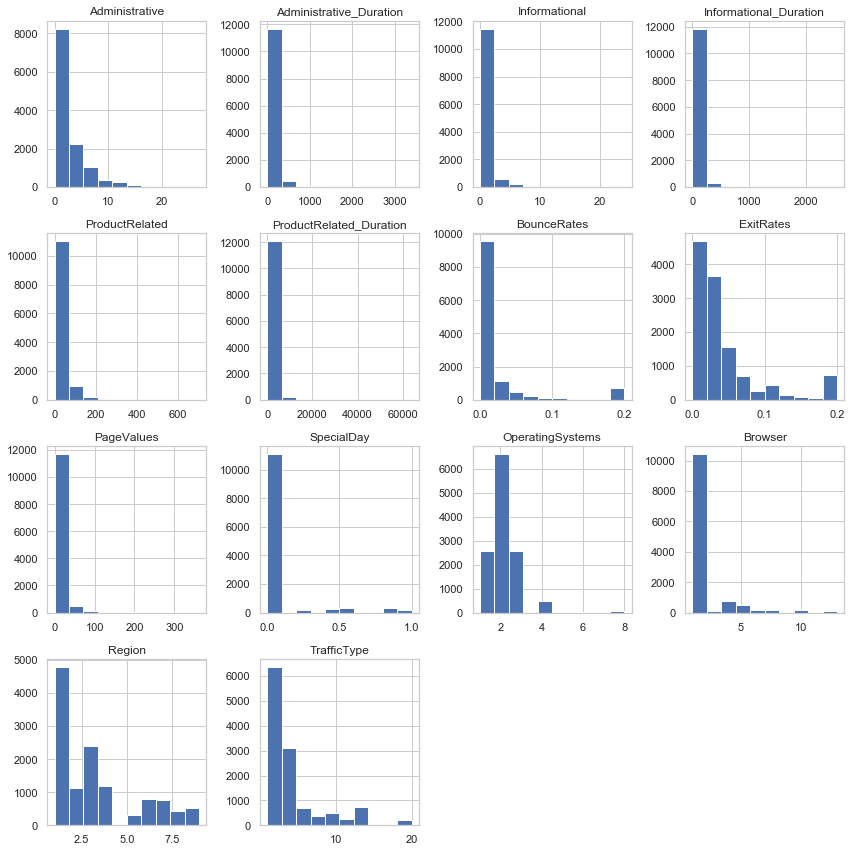

In [14]:
# Plot numeric columns in histograms
ds_useful.auto_subplots(data)

In [67]:
print('3. There are several numeric attributes. They are:')
print(data.select_dtypes('number').columns)

print('\nHowever only some of them are continuous. As you can see, the following columns have only a few choices:')
cat_num_cols = []
cont_num_cols = []
for col in data.select_dtypes('number').columns:
    if len(data[col].unique()) < len(data) / 50:
        print(col, data[col].unique())
        cat_num_cols.append(col)
    else:
        cont_num_cols.append(col)

print('If we think about each of those columns logically, we can reach the assumption that their numerical data is actually representative of categories, not continuous variables')

print('\nThe categorical numerical columns:', cat_num_cols)
print('The continuous numerical columns:', cont_num_cols)

3. There are several numeric attributes. They are:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

However only some of them are continuous. As you can see, the following columns have only a few choices:
Administrative [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Informational [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
SpecialDay [0.  0.4 0.8 1.  0.2 0.6]
OperatingSystems [1 2 4 3 7 6 8 5]
Browser [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Region [1 9 2 3 4 5 6 7 8]
TrafficType [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
If we think about each of those columns logically, we can reach the assumption that their numerical data is actually representative of categories, not continuo

4. It seems to me that the target label is going to be REVENUE


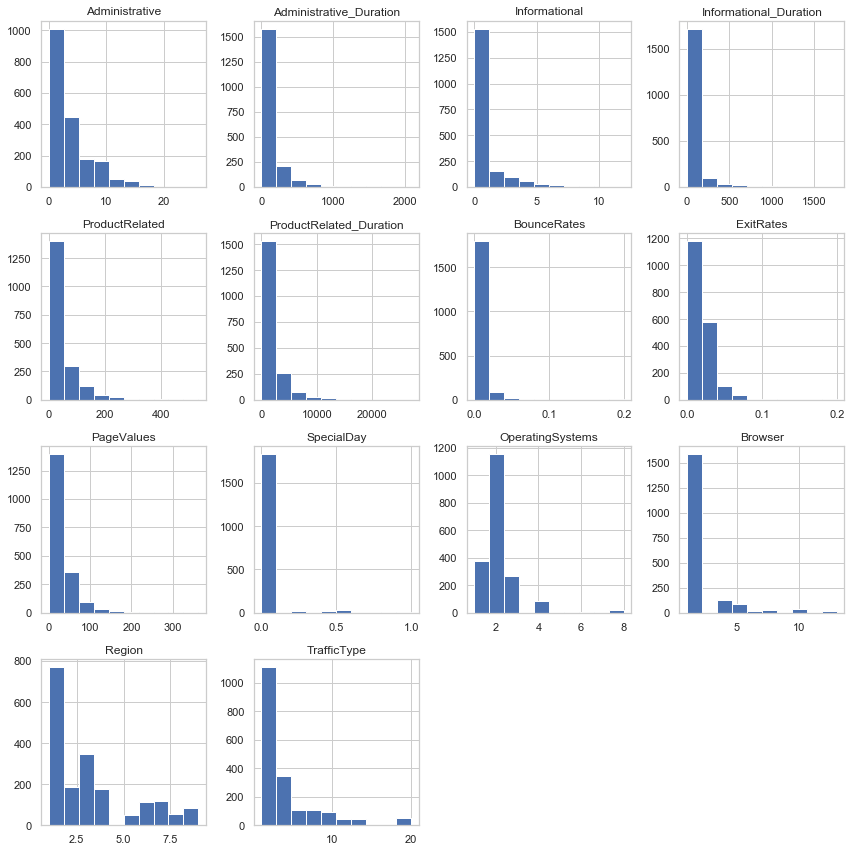

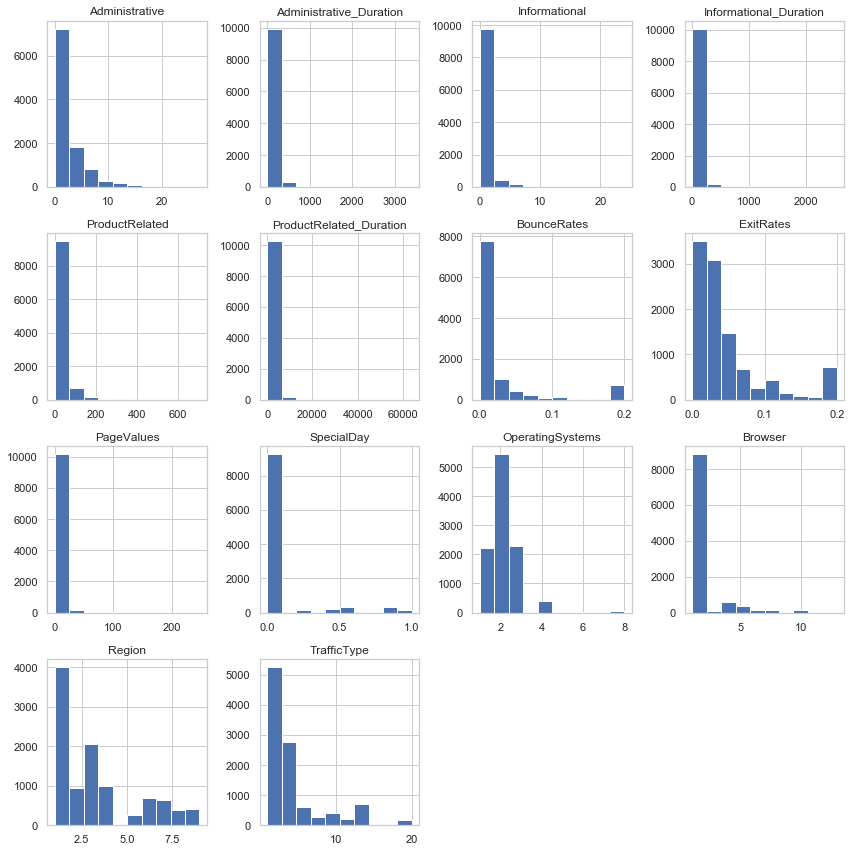

In [62]:
print('4. It seems to me that the target label is going to be REVENUE')
ds_useful.auto_subplots(data.loc[data.Revenue == True])
ds_useful.auto_subplots(data.loc[data.Revenue == False])

In [65]:
print('5. There are {} features in the dataset'.format(len(data.columns) - 1))

5. There are 17 features in the dataset


In [68]:
print('6. Preprocessiong should include attributing numeric qualities to the categorical data that is storing strings. I would also look at selecting specific categorical attributes to keep.')

6. Preprocessiong should include attributing numeric qualities to the categorical data that is storing strings. I would also look at selecting specific categorical attributes to keep.


# Doneso